In [10]:
import pandas as pd
import numpy as np
import os

In [24]:
# Bank 경로 및 파일명을 입력
BANK_NAME='../BANKS/m2_s2_bank_3a3f03ea56ed7e49b2570d5e8320044b__site_0d39d11b52565146a236a646d49133f4.csv'

In [38]:
# 모든 Bank -> Cell 분리
data=pd.read_csv(BANK_NAME)

# cell 저장할 폴더 생성

# 폴더로 이동



# cell 분리
for cellnum in range(1,97):
    df=data[data['CellNo']==cellnum].reset_index(drop=True)
    
    # 스파이크 제거
    x=np.std(df['ResistValue'])
    drop_idx=[]
    for i in range(1, len(df)):
        if abs(df['ResistValue'][i]-df['ResistValue'][i-1])>x:
            drop_idx.append(i)
    for i in drop_idx:
        df.drop(i, inplace=True)
    df = df.reset_index(drop=True)

    # cell 분리
    x=np.std(df['ResistValue'])
    divide_idx=[]
    for i in range(1,len(df)):
        if abs(df['ResistValue'][i]-df['ResistValue'][i-1])>x:
            divide_idx.append(i)
    cnt=1
    last=0
    for x in divide_idx:
        filename=str(cellnum)+'_cell_'+str(cnt)+'.csv'
        tmp=df[last:x]
        if len(tmp)>120:
            tmp.to_csv(filename, index=False)
            cnt+=1
        last=x
        if x==divide_idx[-1]:
            tmp=df[last:]
            filename=str(cellnum)+'_cell_'+str(cnt)+'.csv'
            if len(tmp)>120:
                tmp.to_csv(filename,index=False)

In [ ]:
# 1일 2회 측정 충당/제거
os.getcwd()

for cell in cells:
    chk_cell = pd.read_csv(cell)
    for i in range(1, (len(chk_cell)-1)):
        # 1일 이상 차이가 난다면
        if abs(pd.Timestamp(chk_cell['KeyTime'][i]) - pd.Timestamp(chk_cell['KeyTime'][i-1])).days >= 1 :
            # 비어있는 날짜 내부저항 -> 앞,뒤 평균값
            avg_resist = (chk_cell['ResistValue'][i-1]+chk_cell['ResistValue'][i])/2
            cnt=0
            while cnt<=1:
                day=1
                idx=i
                new_data={'KeyTime': pd.Timestamp(chk_cell['KeyTime'][i-1])+pd.Timedelta('12H'),
                         'CellNo':chk_cell['CellNo'][i-1],
                         'ResistValue':avg_resist}
                if (str(new_data['KeyTime'])[:10])== str(chk_cell['KeyTime'][:10]):
                    cnt+=1
                    #print(new_data['KeyTime'])
                else:
                    tmp1=chk_cell[chk_cell.index<idx]
                    tmp2=chk_cell[chk_cell.index>=idx]
                    #print(tmp1, tmp2)
                    chk_cell = tmp1.append(new_data, ignore_index=True).append(tmp2,ignore_index=True)
                    idx+=1
                    cnt+=1
                    # print('Added Time',chk_cell['KeyTime'][i])
    
    
    
    cnt_date=1
    chk=pd.Timestamp(chk_cell['KeyTime'][0]).day
    have_to_remove=[]
    for i in range(1,len(chk_cell)):    
        # 하루 2번 정상적으로 측정되었는지 확인하기
        if chk == pd.Timestamp(chk_cell['KeyTime'][i]).day:
            cnt_date+=1
            if cnt_date>2:
                have_to_remove.append(pd.Timestamp(chk_cell['KeyTime'][i]))
                # print('erased Time',chk_cell['KeyTime'][i])
                chk_cell.drop(i,axis=0,inplace=True)

        else:
            cnt_date=1
            chk=pd.Timestamp(chk_cell['KeyTime'][i]).day
    chk_cell.to_csv(cell, index=False)
    

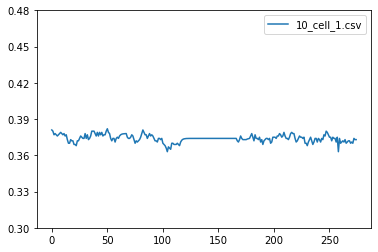

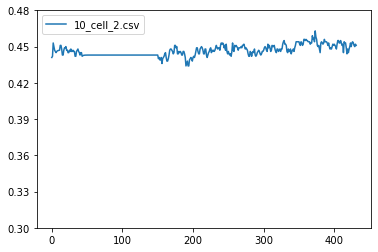

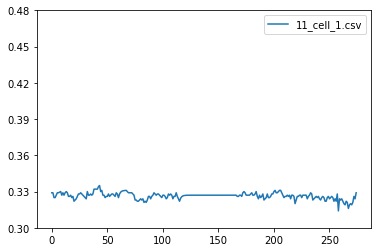

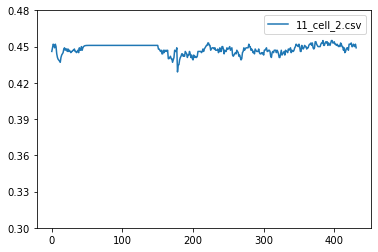

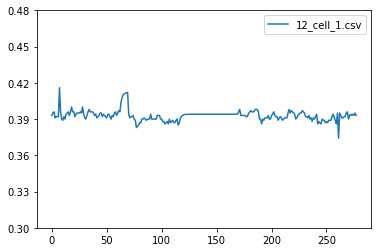

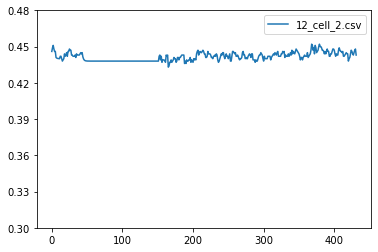

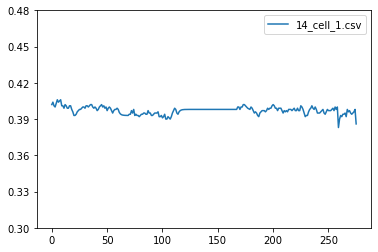

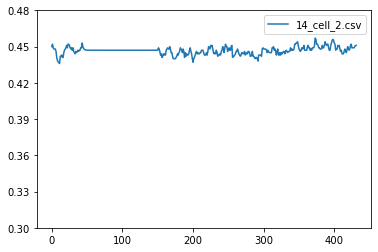

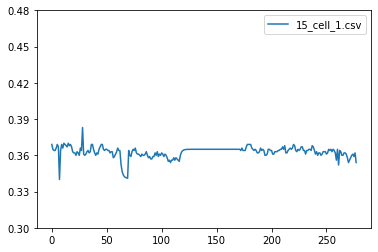

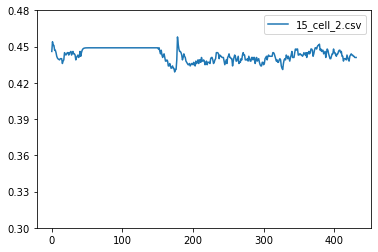

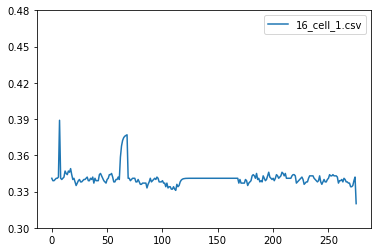

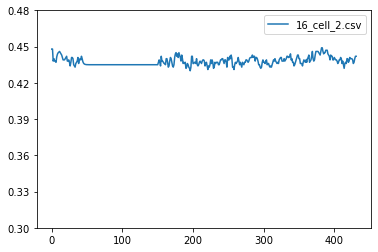

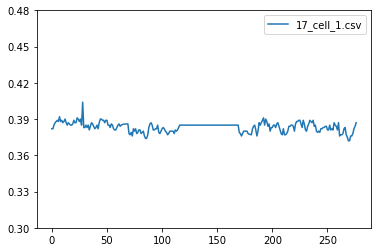

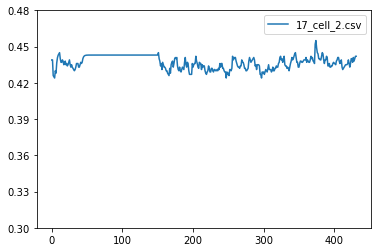

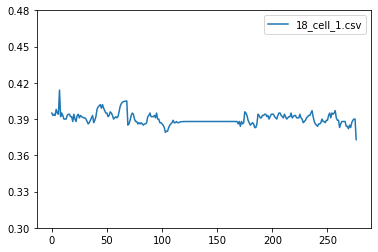

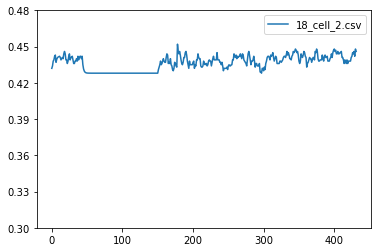

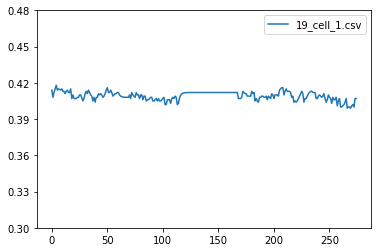

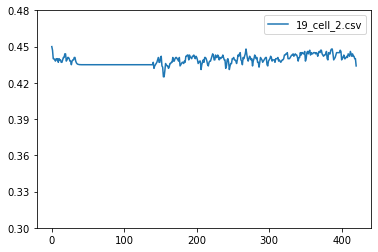

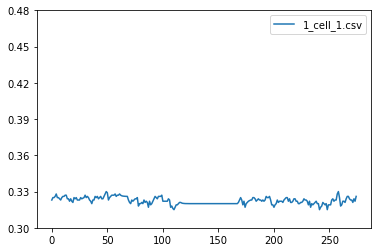

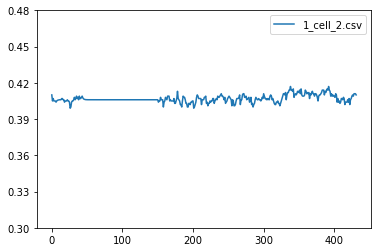

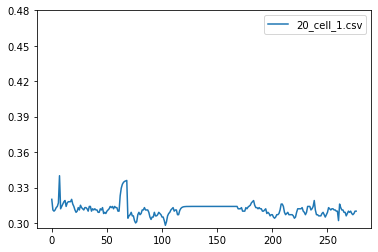

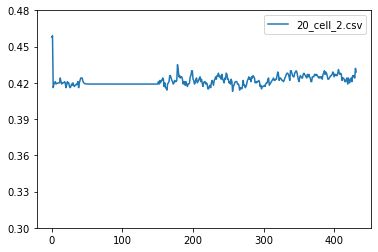

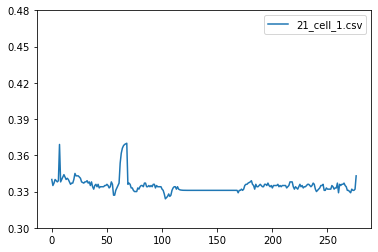

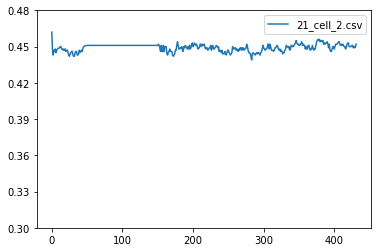

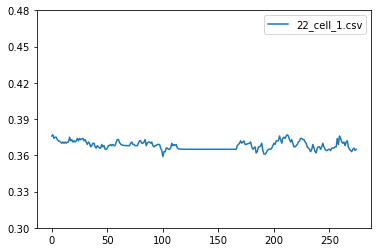

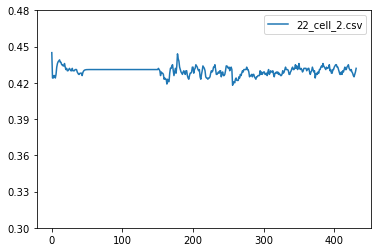

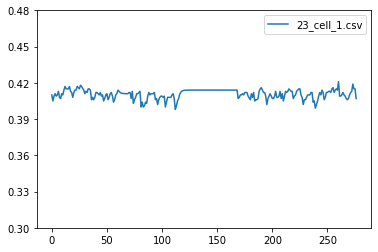

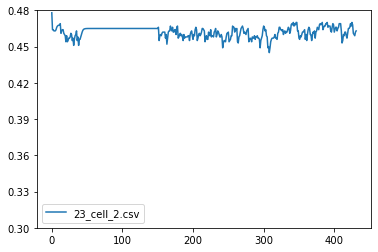

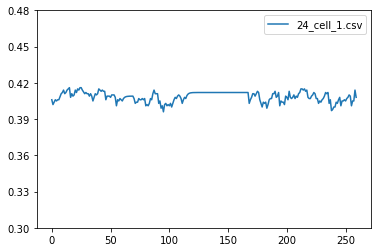

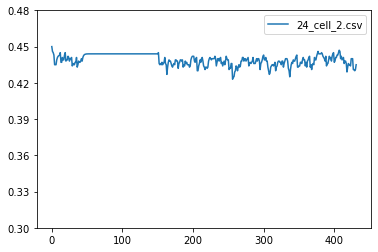

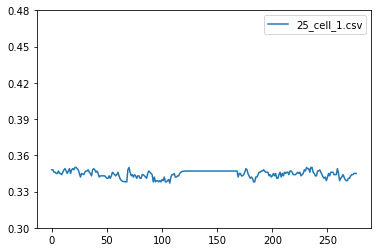

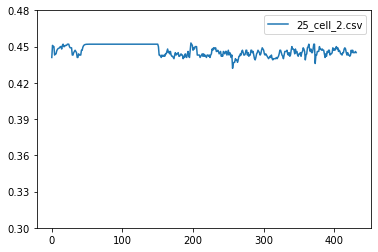

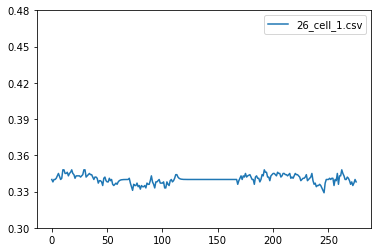

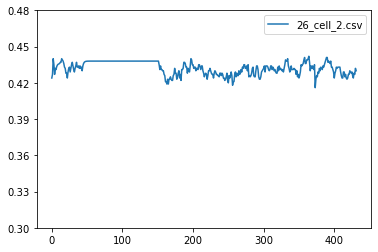

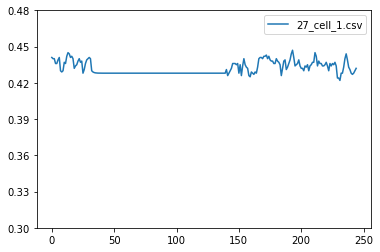

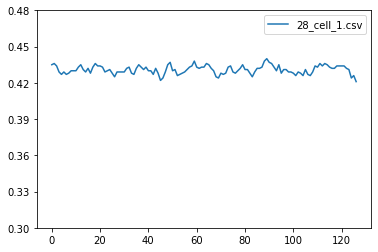

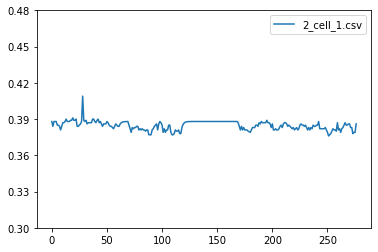

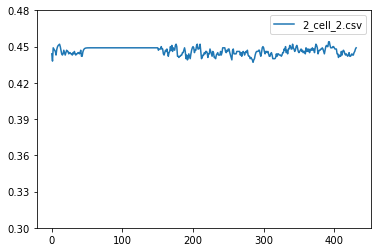

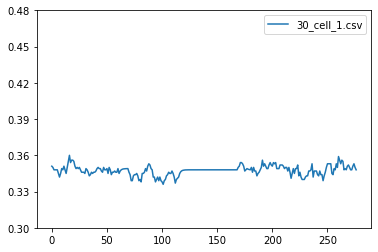

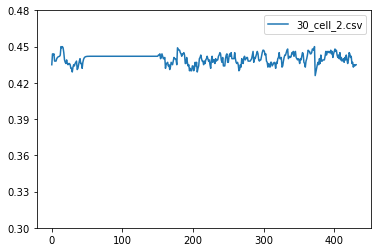

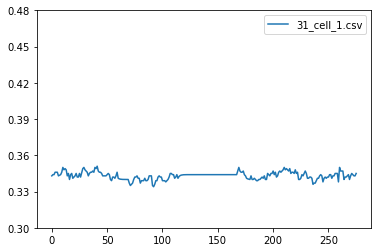

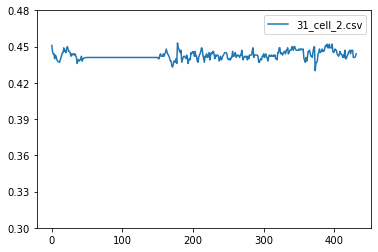

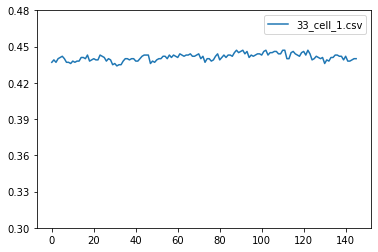

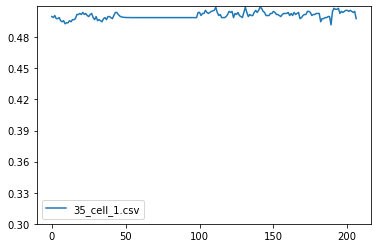

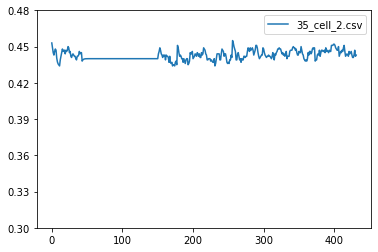

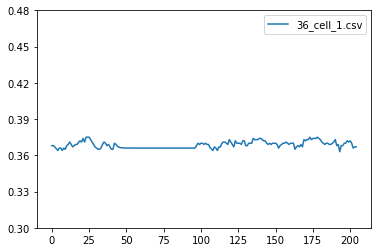

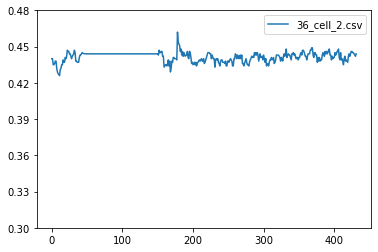

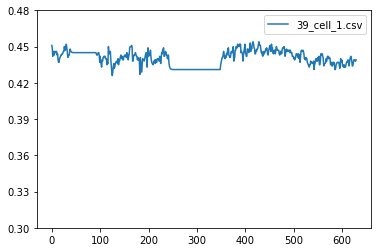

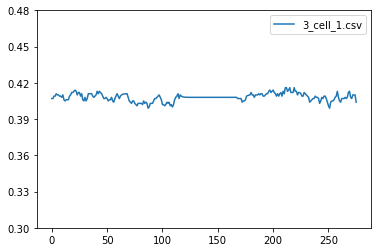

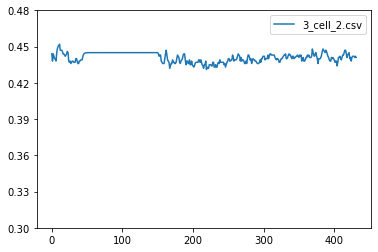

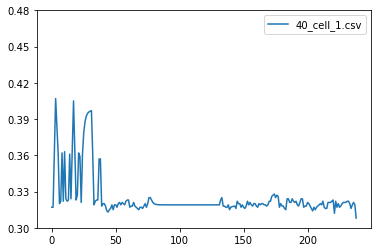

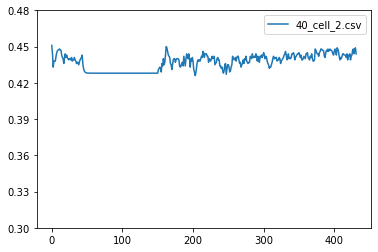

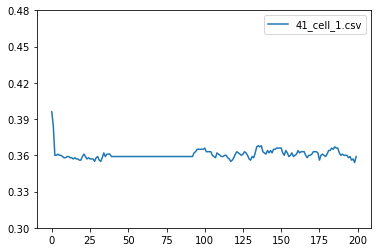

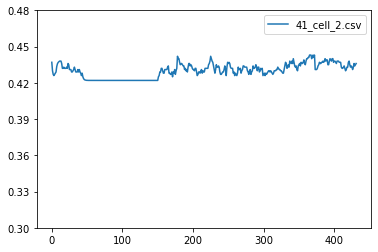

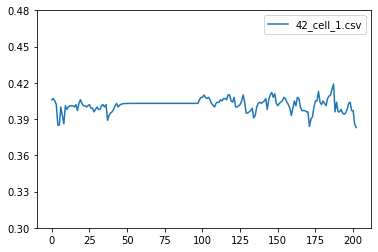

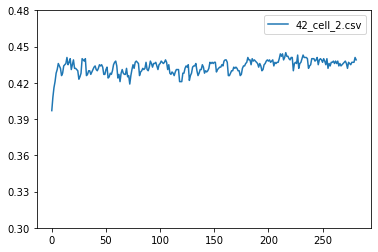

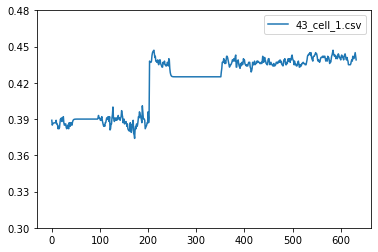

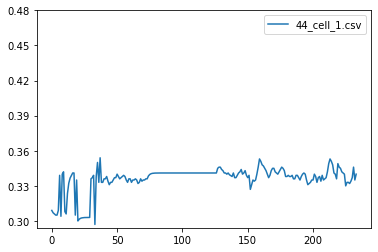

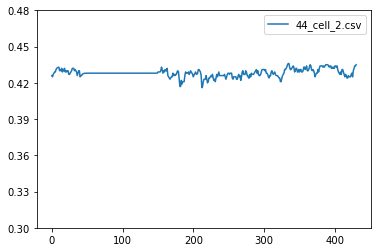

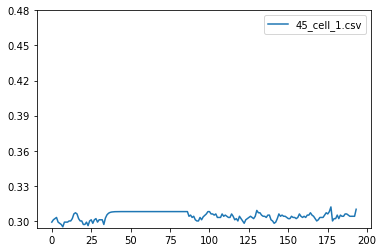

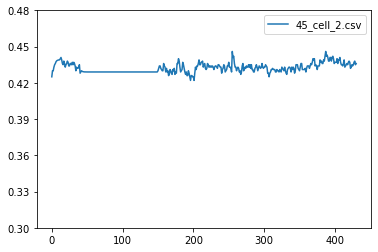

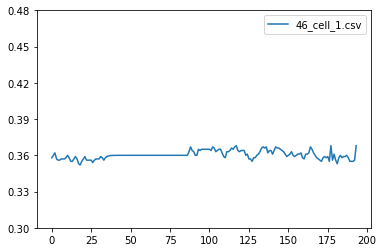

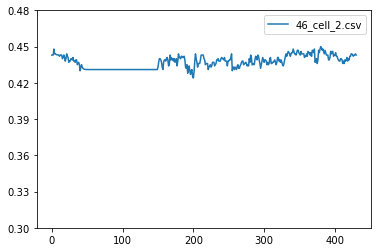

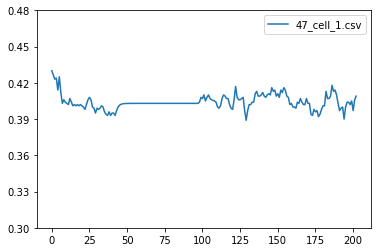

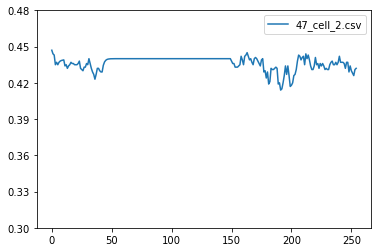

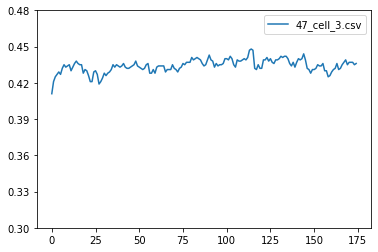

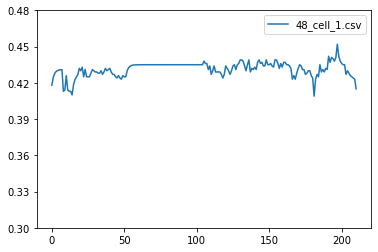

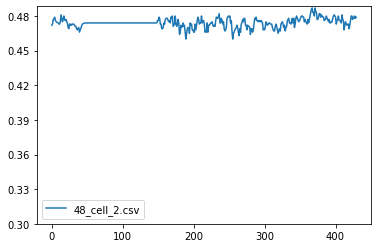

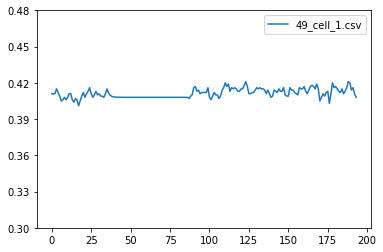

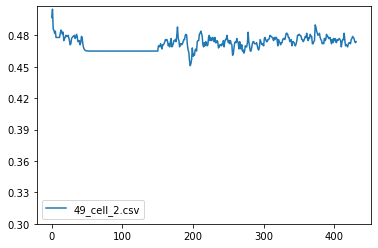

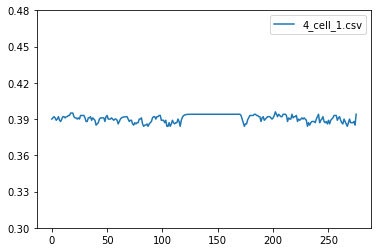

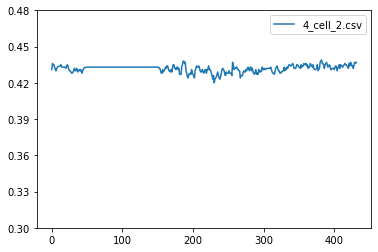

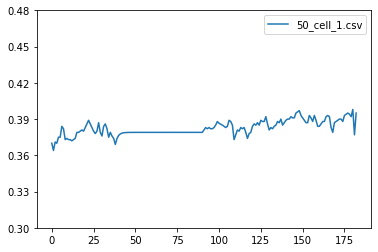

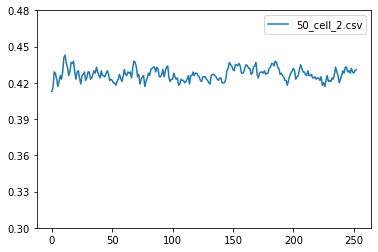

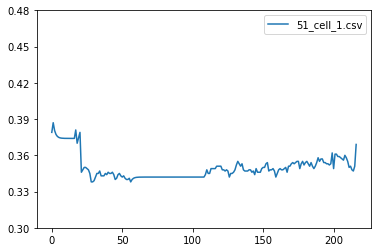

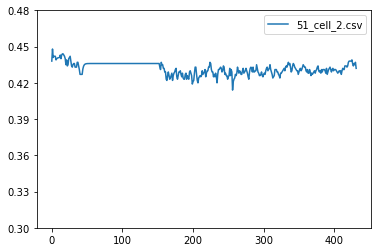

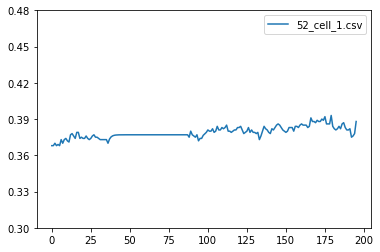

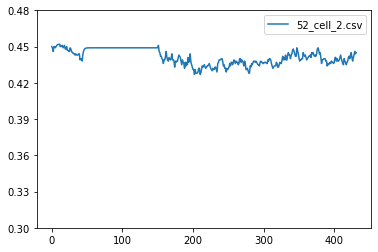

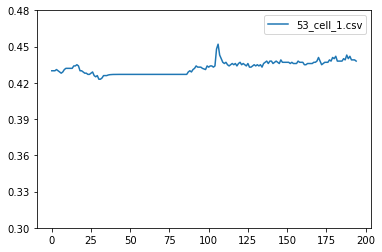

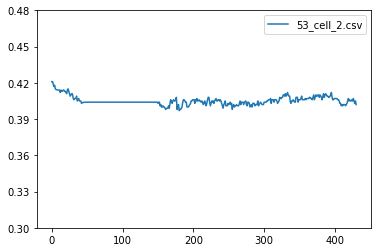

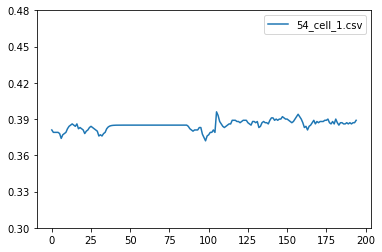

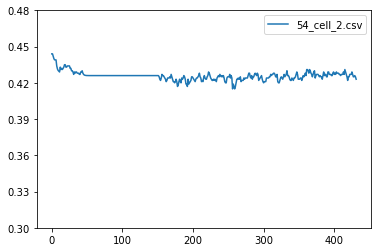

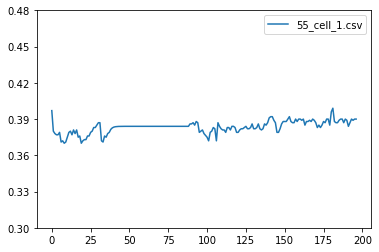

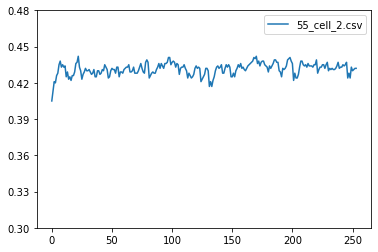

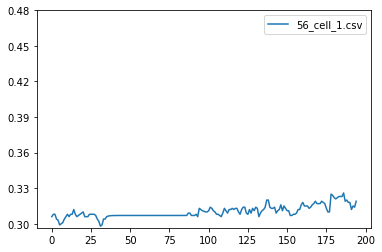

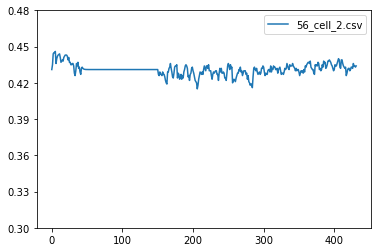

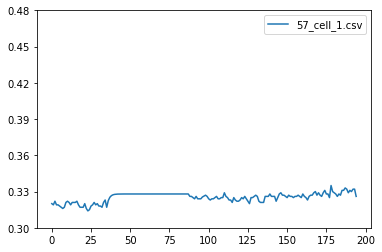

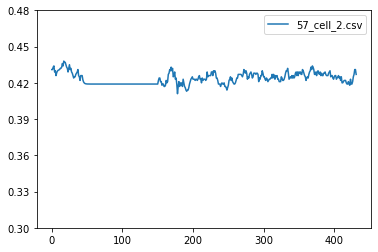

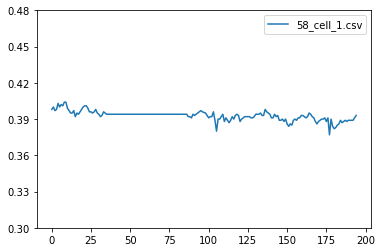

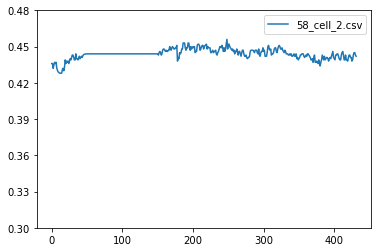

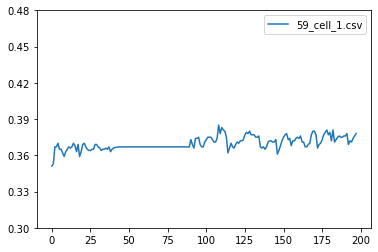

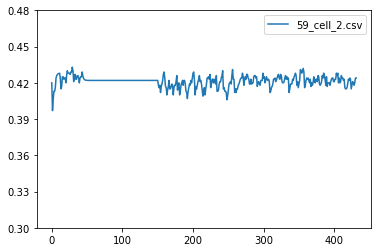

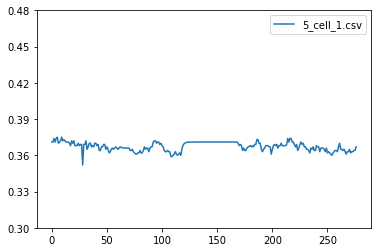

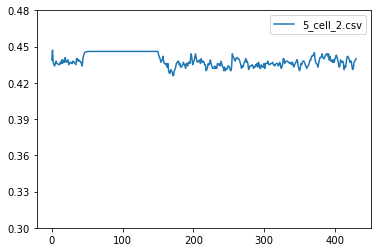

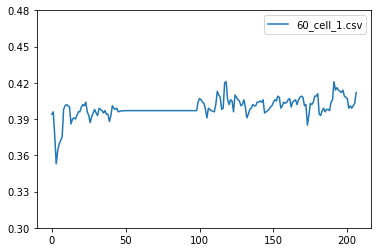

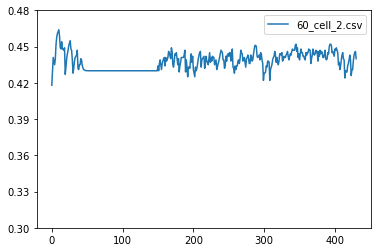

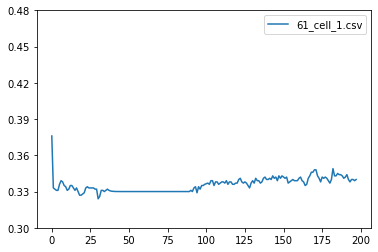

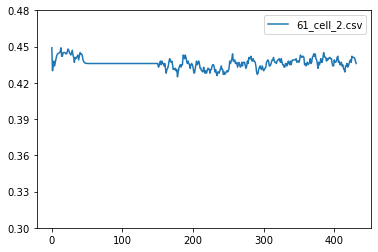

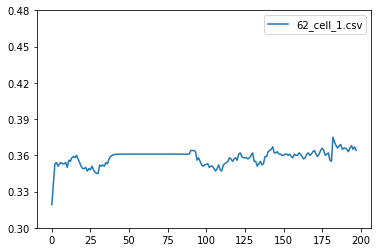

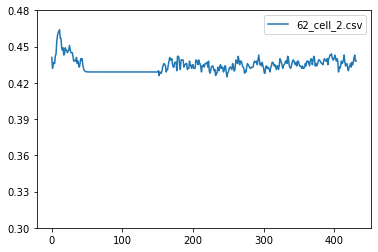

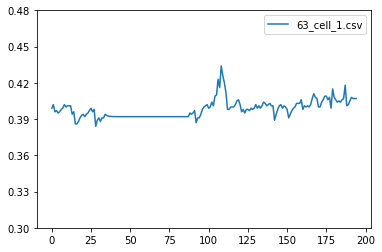

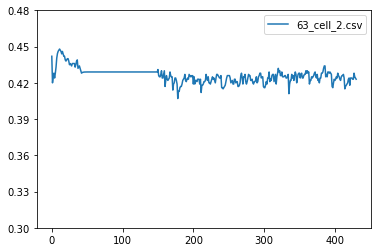

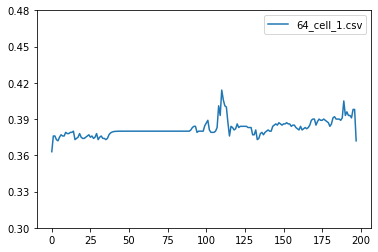

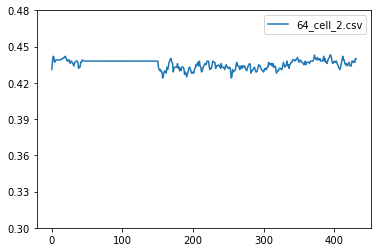

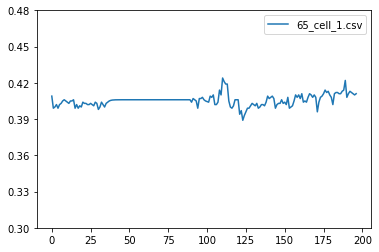

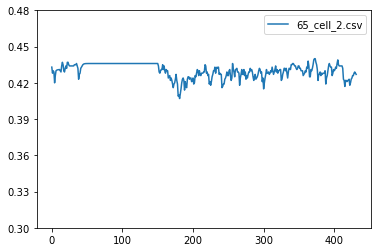

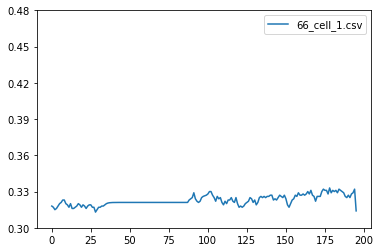

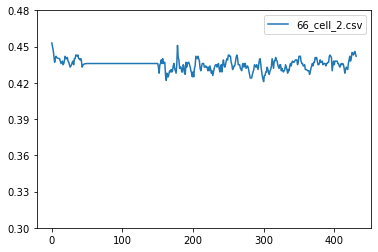

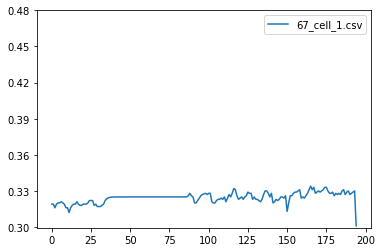

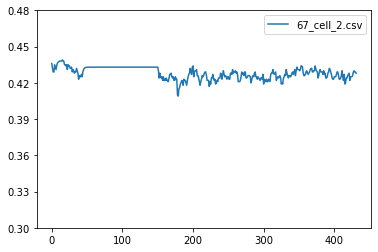

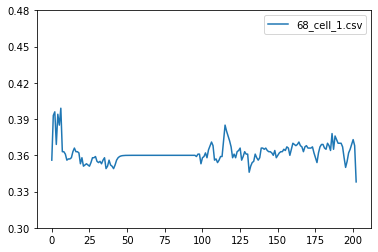

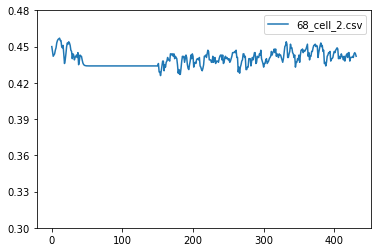

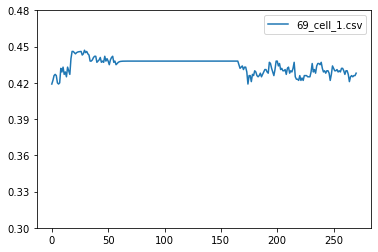

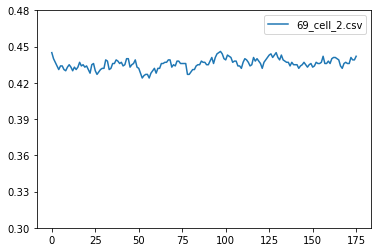

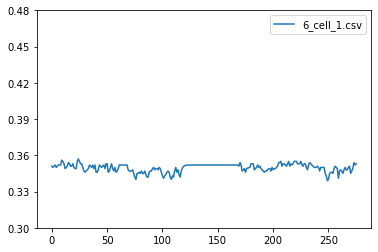

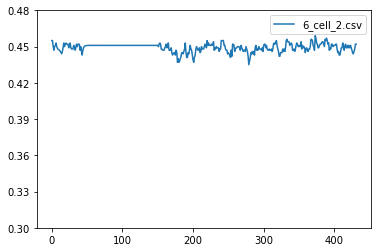

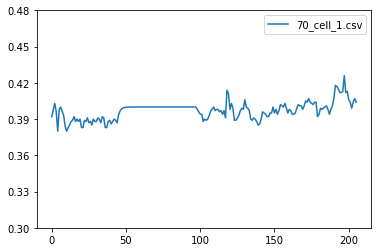

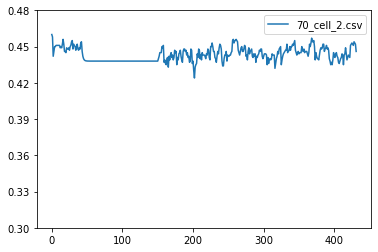

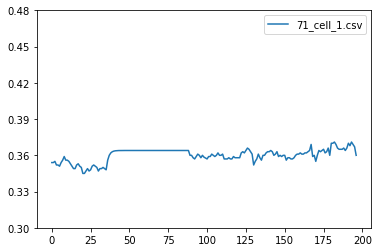

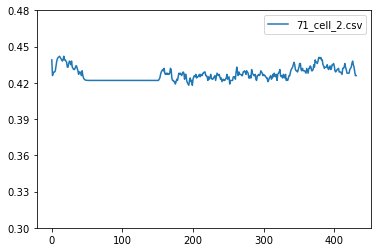

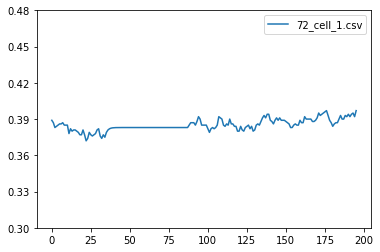

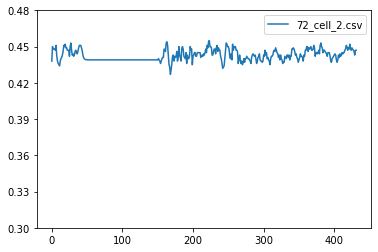

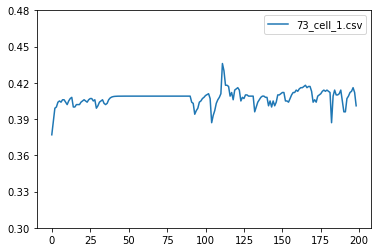

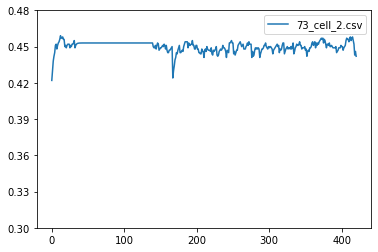

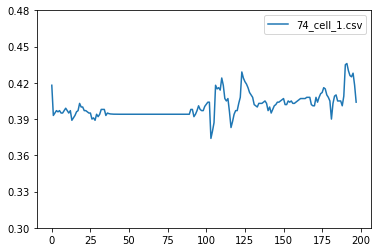

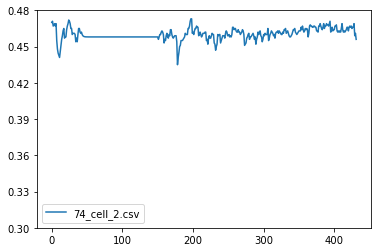

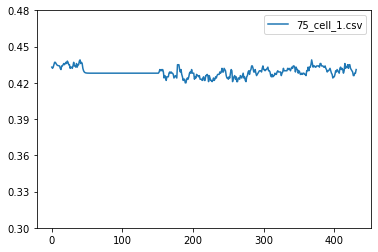

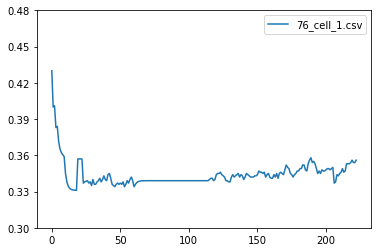

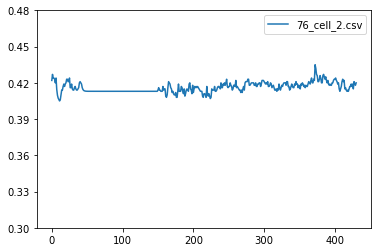

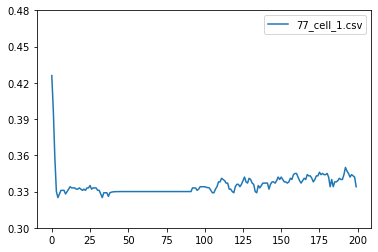

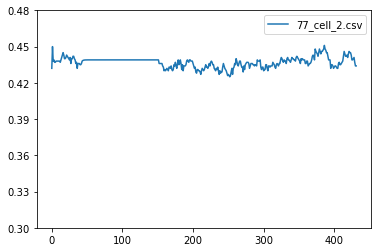

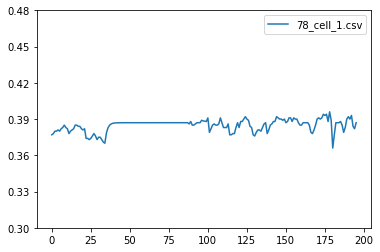

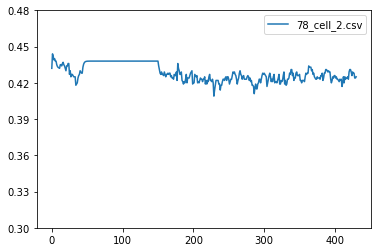

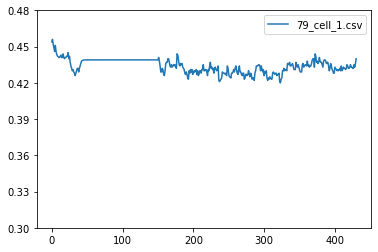

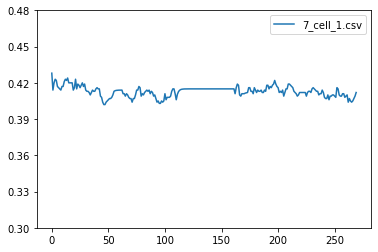

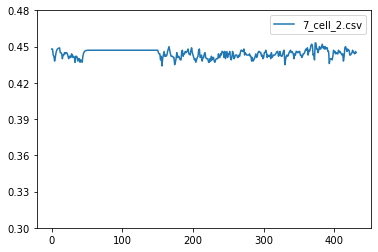

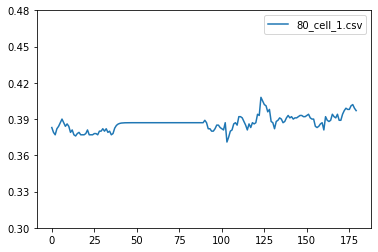

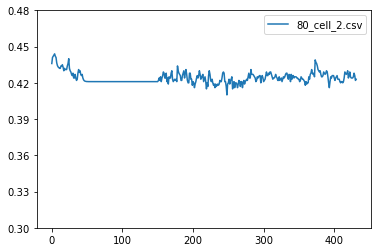

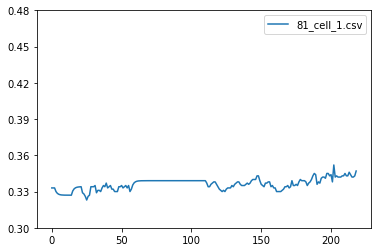

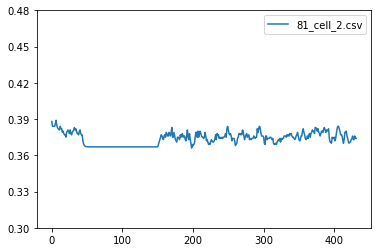

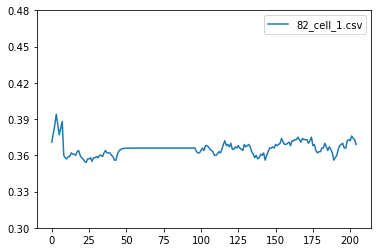

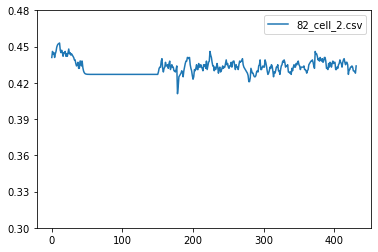

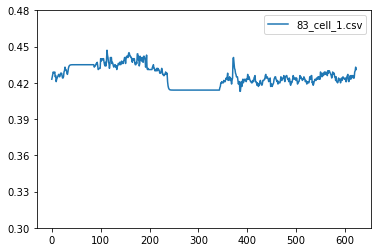

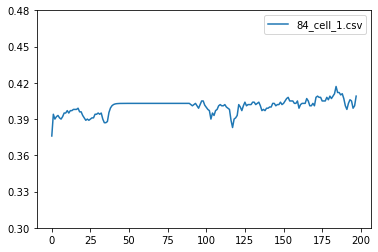

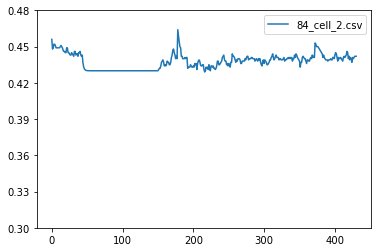

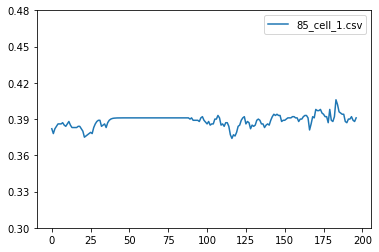

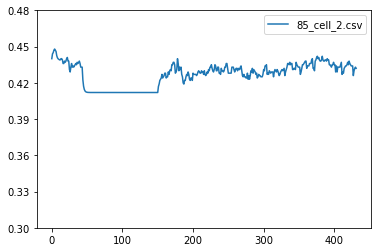

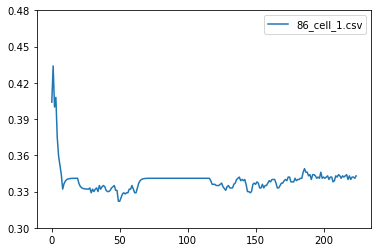

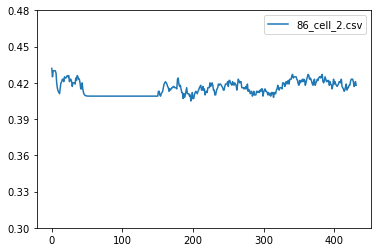

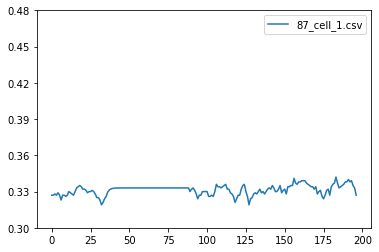

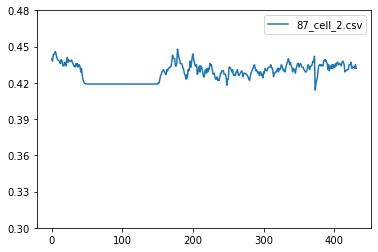

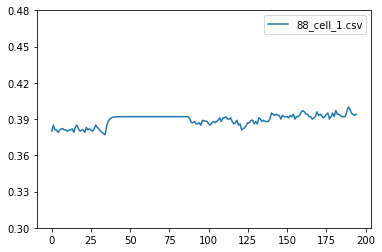

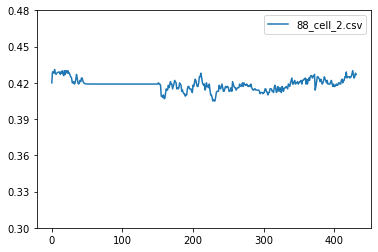

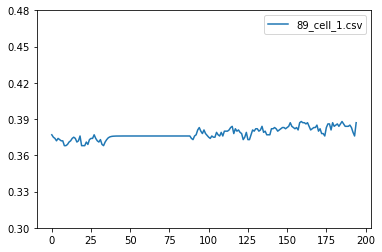

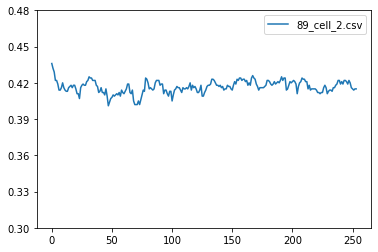

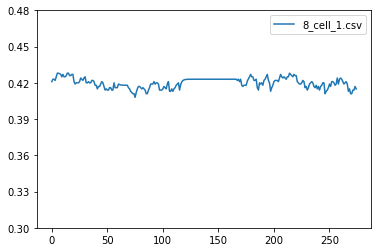

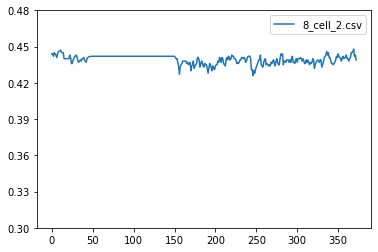

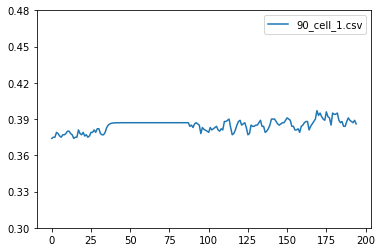

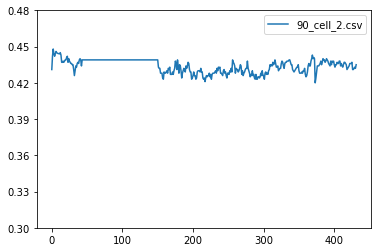

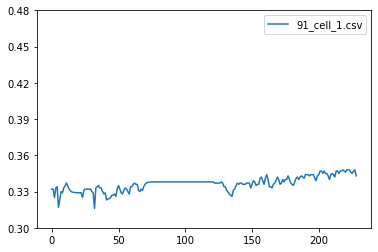

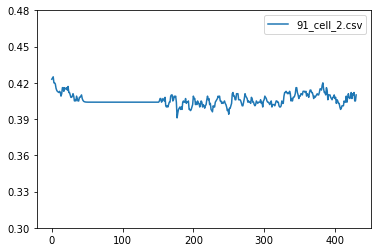

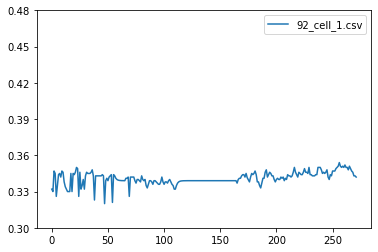

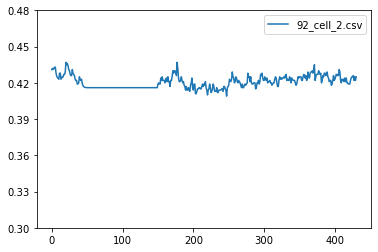

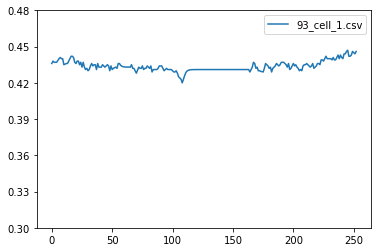

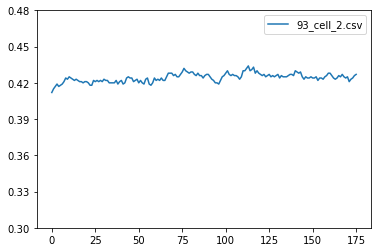

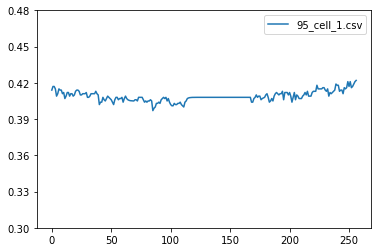

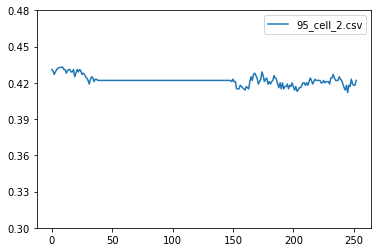

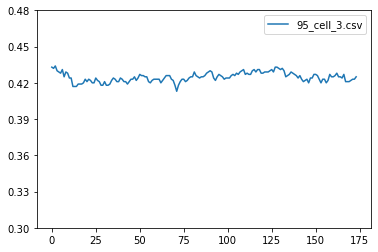

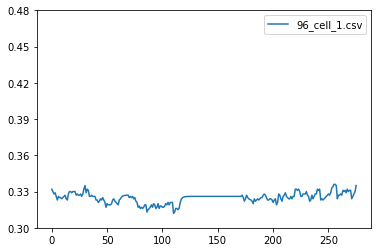

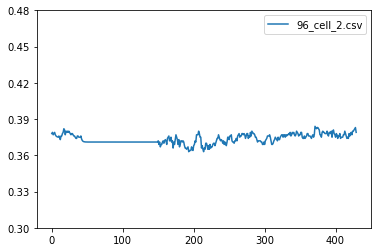

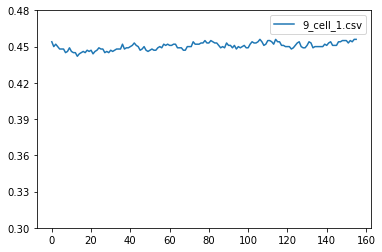

In [37]:
import matplotlib.pyplot as plt
for x in cells:
    df=pd.read_csv(x)
    plt.plot(df['ResistValue'], label=x)
    plt.legend()
    plt.yticks(np.arange(0.3,0.5,0.03))
    plt.show()